In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel, linear_kernel

# Define a range of input values

In [2]:
# Imports
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.simplefilter("ignore")

import numpy as np
import tensorflow as tf
#import tensorflow_probability as tfp

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
from scipy.spatial.distance import pdist, cdist, squareform



2025-02-04 20:39:44.046266: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-04 20:39:44.094851: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-04 20:39:44.816149: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# Plotting function to be used below

def plot_kernel(X, y, Σ, description, fig, subplot_spec, xlim,
                scatter=False, rotate_x_labels=False):
    """Plot kernel matrix and samples."""
    grid_spec = gridspec.GridSpecFromSubplotSpec(
        1, 2, width_ratios=[2,1], height_ratios=[1],
        wspace=0.18, hspace=0.0,
        subplot_spec=subplot_spec)
    ax1 = fig.add_subplot(grid_spec[0])
    ax2 = fig.add_subplot(grid_spec[1])
    # Plot samples
    if scatter:
        for i in range(y.shape[1]):
            ax1.scatter(X, y[:,i], alpha=0.8, s=3)
    else:
        for i in range(y.shape[1]):
            ax1.plot(X, y[:,i], alpha=0.8)
    ax1.set_ylabel('$y$', fontsize=13, labelpad=0)
    ax1.set_xlabel('$x$', fontsize=13, labelpad=0)
    ax1.set_xlim(xlim)
    if rotate_x_labels:
        for l in ax1.get_xticklabels():
            l.set_rotation(30)
    ax1.set_title(f'Samples from {description}')
    # Plot covariance matrix
    im = ax2.imshow(Σ, cmap=cm.YlGnBu)
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.02)
    cbar = plt.colorbar(im, ax=ax2, cax=cax)
    cbar.ax.set_ylabel('$K(X,X)$', fontsize=8)
    ax2.set_title(f'Covariance matrix\n{description}')
    ax2.set_xlabel('X', fontsize=10, labelpad=0)
    ax2.set_ylabel('X', fontsize=10, labelpad=0)
    # Show 5 custom ticks on x an y axis of covariance plot
    nb_ticks = 5
    ticks = list(range(xlim[0], xlim[1]+1))
    ticks_idx = np.rint(np.linspace(
        1, len(ticks), num=min(nb_ticks,len(ticks)))-1).astype(int)
    ticks = list(np.array(ticks)[ticks_idx])
    ax2.set_xticks(np.linspace(0, len(X), len(ticks)))
    ax2.set_yticks(np.linspace(0, len(X), len(ticks)))
    ax2.set_xticklabels(ticks)
    ax2.set_yticklabels(ticks)
    if rotate_x_labels:
        for l in ax2.get_xticklabels():
            l.set_rotation(30)
    ax2.grid(False)
#

In [5]:
def RationalQuadratic(x,y,length_scale=2,alpha=1):
    #length_scale = 2.0
    #alpha = 1.0
    dists = cdist(x, y, metric='sqeuclidean')
    K = (1 + dists / (2 * alpha * length_scale ** 2)) ** - alpha
    return K

In [6]:
def RationalQuadratic_minkow_p(x,y,pp,length_scale=2,alpha=1):
    #length_scale = 2.0
    #alpha = 2.0
    dists = cdist(x, y, metric='minkowski',p=pp)
    K = (1 + dists / (2 * alpha * length_scale ** 2)) ** - alpha
    return K

In [7]:
def RationalQuadratic_new(x,y,length_scale=2,alpha=1):
    #length_scale = 2.0
    #alpha = 2.0
    dists = cdist(x, y, metric='minkowski',p=5)
    K = (1 + dists / (2 * alpha * length_scale ** 2)) ** - alpha
    return K

In [8]:
def RationalQuadratic_new5(x,y,length_scale=2,alpha=1):
    #length_scale = 2.0
    #alpha = 2.0
    dists = cdist(x, y, metric='minkowski',p=5)
    K = (1 + dists / (2 * alpha * length_scale ** 2)) ** - alpha
    return K

In [10]:
def myrbf2(x,y):
    length_scale=2
    dists = cdist(x / length_scale, y / length_scale,  metric='sqeuclidean')
    res = np.exp(-.5 * dists)
    return res

In [11]:
def myrbf3(x,y,length_scale):
    #length_scale=2
    dists = cdist(x / length_scale, y / length_scale,  metric='sqeuclidean')
    res = np.exp(-.5* dists)
    return res

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel, linear_kernel

In [13]:
nb_of_samples = 201  # Number of test points.
nb_of_realizations = 3  # Number of function realizations
# Generate input points
xlim = (-10, 10)
X = np.expand_dims(np.linspace(*xlim, nb_of_samples), 1)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


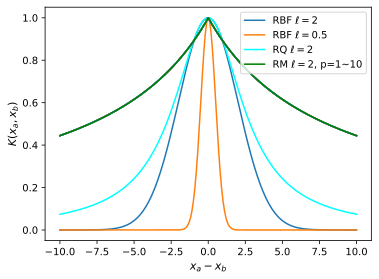

In [15]:
fig, ax = plt.subplots(figsize=(5.4, 4))

test_rbf1=myrbf3(X,X, length_scale=2)
test_rbf2=myrbf3(X,X,length_scale=0.5)
test_raqu=RationalQuadratic(X, X,length_scale=2)
test_raq_min=RationalQuadratic_new(X,X, length_scale=2)

ax.plot(X, test_rbf1[100,:], label='RBF $\\ell = 2$')
ax.plot(X, test_rbf2[100,:], label='RBF $\\ell = 0.5$')
ax.plot(X, test_raqu[100,:], label='RQ $\\ell = 2$',color="cyan")

for i in range(1,10):
    test_raq_min=RationalQuadratic_minkow_p(X,X,pp=i,length_scale=2)
    ax.plot(X, test_raq_min[100,:])

ax.plot(X, test_raq_min[100,:], label='RM $\\ell = 2$, p=1~10',color="green")

ax.set_xlabel('$x_a - x_b$', fontsize=11)
ax.set_ylabel('$K(x_a,x_b)$', fontsize=11)
#ax.set_title(' plot')

ax.legend(loc=1)
plt.tight_layout()
plt.savefig('Kernelcompare.eps')
plt.show()

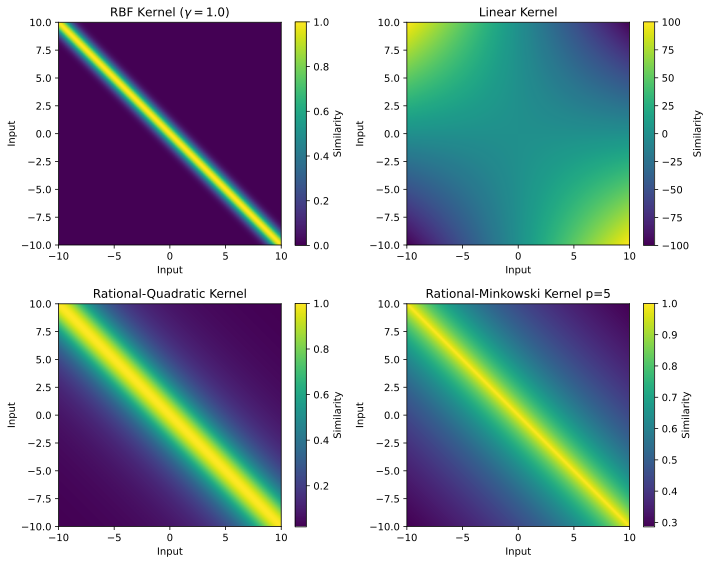

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel, linear_kernel

# Define a range of input values
X = np.linspace(-10, 10, 1000).reshape(-1, 1)

# Compute RBF kernel
gamma = 1.0  # RBF kernel parameter
K_rbf = rbf_kernel(X, X, gamma=gamma)

# Compute Linear kernel
K_linear = linear_kernel(X, X)

K_ra= RationalQuadratic(X,X)
K_ramin=RationalQuadratic_new(X,X)

# Plot RBF kernel
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(K_rbf, cmap='viridis', extent=(-10, 10, -10, 10))
plt.title('RBF Kernel ($\gamma={}$)'.format(gamma))
plt.colorbar(label='Similarity')
plt.xlabel('Input')
plt.ylabel('Input')

# Plot Linear kernel
plt.subplot(2, 2, 2)
plt.imshow(K_linear, cmap='viridis',extent=(-10, 10, -10, 10))
plt.title('Linear Kernel')
plt.colorbar(label='Similarity')
plt.xlabel('Input')
plt.ylabel('Input')

plt.subplot(2, 2, 3)
plt.imshow(K_ra, cmap='viridis', extent=(-10, 10, -10, 10))
plt.title('Rational-Quadratic Kernel')
plt.colorbar(label='Similarity')
plt.xlabel('Input')
plt.ylabel('Input')

plt.subplot(2, 2, 4)
plt.imshow(K_ramin, cmap='viridis', extent=(-10, 10, -10, 10))
plt.title('Rational-Minkowski Kernel p=5')
plt.colorbar(label='Similarity')
plt.xlabel('Input')
plt.ylabel('Input')
plt.tight_layout()
plt.savefig('kernels1.eps')

plt.show()